Загружаем датасет

In [112]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

Классификация k-ближайших

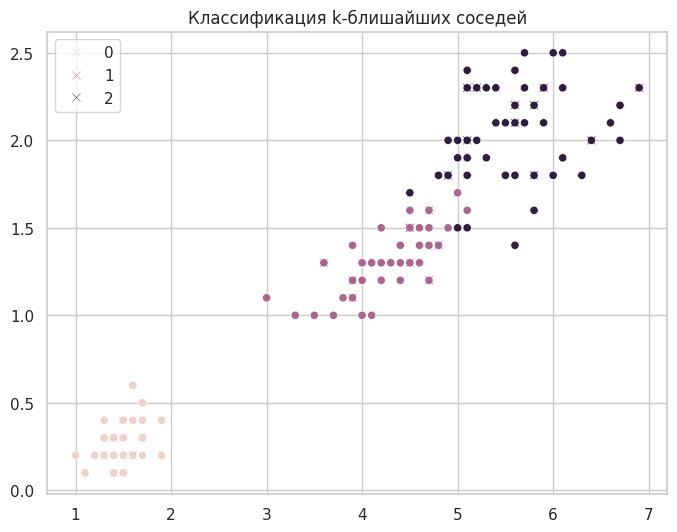

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y, legend=False)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=y_pred_knn, marker='x', legend=True, alpha=0.7)
plt.title('Классификация k-блишайших соседей')
plt.show()

Классификация случайным лесом

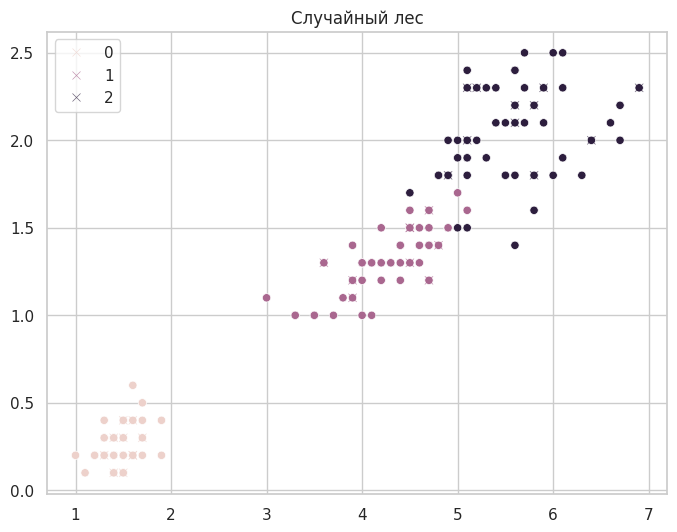

In [114]:
from sklearn.ensemble import RandomForestClassifier
import random
rf = RandomForestClassifier(n_estimators=100, random_state=random.randint(0, 100))
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y, legend=False)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=y_pred_rf, marker='x', legend=True, alpha=0.7)
plt.title('Случайный лес')
plt.show()

Результат очень похож на k-ближайших соседей
![хм](https://media4.giphy.com/media/CaiVJuZGvR8HK/200w.gif?cid=6c09b952xj1qr63yj5y5iqdaqkdpmgbtdjfw2re2ow6l3udy&ep=v1_gifs_search&rid=200w.gif&ct=g)

Класификация методом опорных векторов

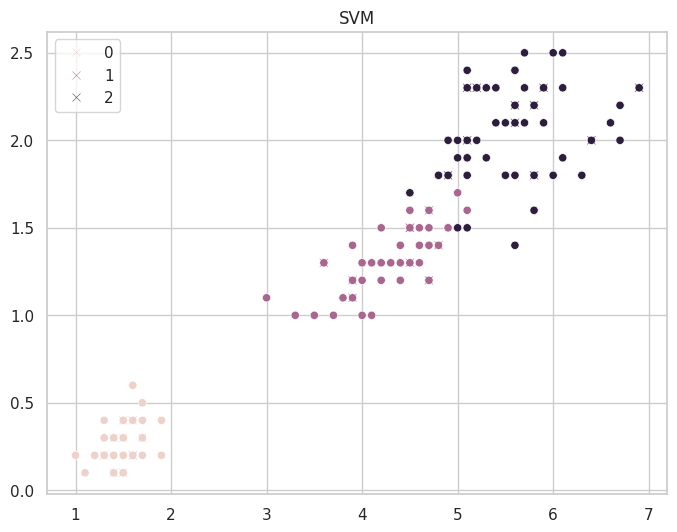

In [115]:
from sklearn.svm import SVC


svm = SVC(kernel='linear', random_state=random.randint(0, 100))
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y, legend=False)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=y_pred_svm, marker='x', legend=True, alpha=0.7)
plt.title('SVM')
plt.show()

Кластеризация k-means-ом

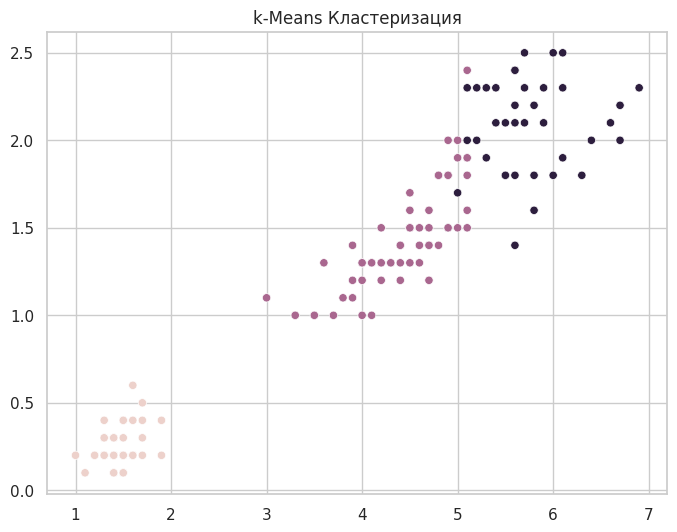

In [116]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=random.randint(0, 100))
kmeans.fit(X)

y_pred_kmeans = kmeans.predict(X)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y_pred_kmeans, legend=False)
plt.title('k-Means Кластеризация')
plt.show()

Метод Уорда

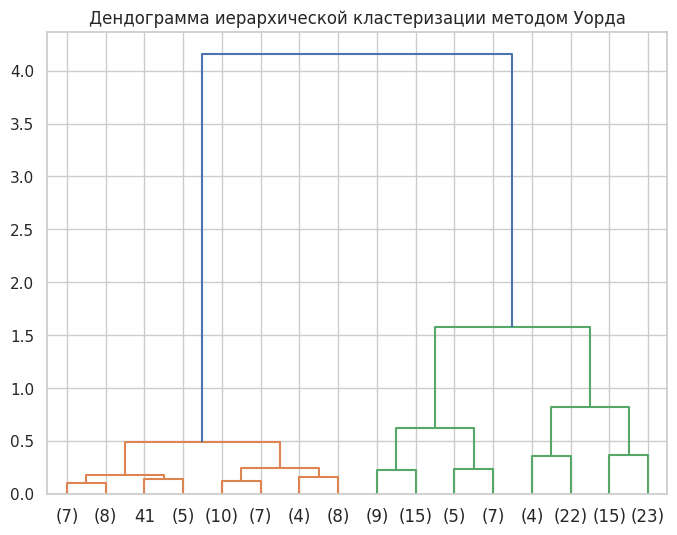

In [117]:
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering

X_scaled = (X - X.min()) / (X.max() - X.min())

linkage_matrix = ward(X_scaled)

plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Дендограмма иерархической кластеризации методом Уорда')
plt.show()

Спектральная кластеризация

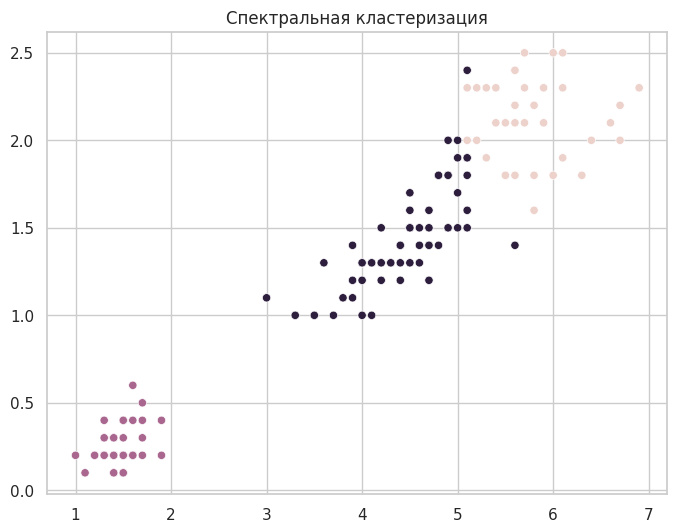

In [118]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=3, random_state=42)
y_pred_spectral = sc.fit_predict(X)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y_pred_spectral, legend=False)
plt.title('Спектральная кластеризация')
plt.show()

HTRU2 (пульсары)

Импортим (снова, но ладно, чтобы были)

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Датасет из .csv

In [120]:
path = 'HTRU_2.csv'
df = pd.read_csv(path)

Посмотрим что там

In [121]:
df.head()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Profile_mean       17898 non-null  float64
 1   Profile_stdev      17898 non-null  float64
 2    Profile_skewness  17898 non-null  float64
 3   Profile_kurtosis   17898 non-null  float64
 4   DM_mean            17898 non-null  float64
 5   DM_stdev           17898 non-null  float64
 6   DM_skewness        17898 non-null  float64
 7   DM_kurtosis        17898 non-null  float64
 8   target             17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


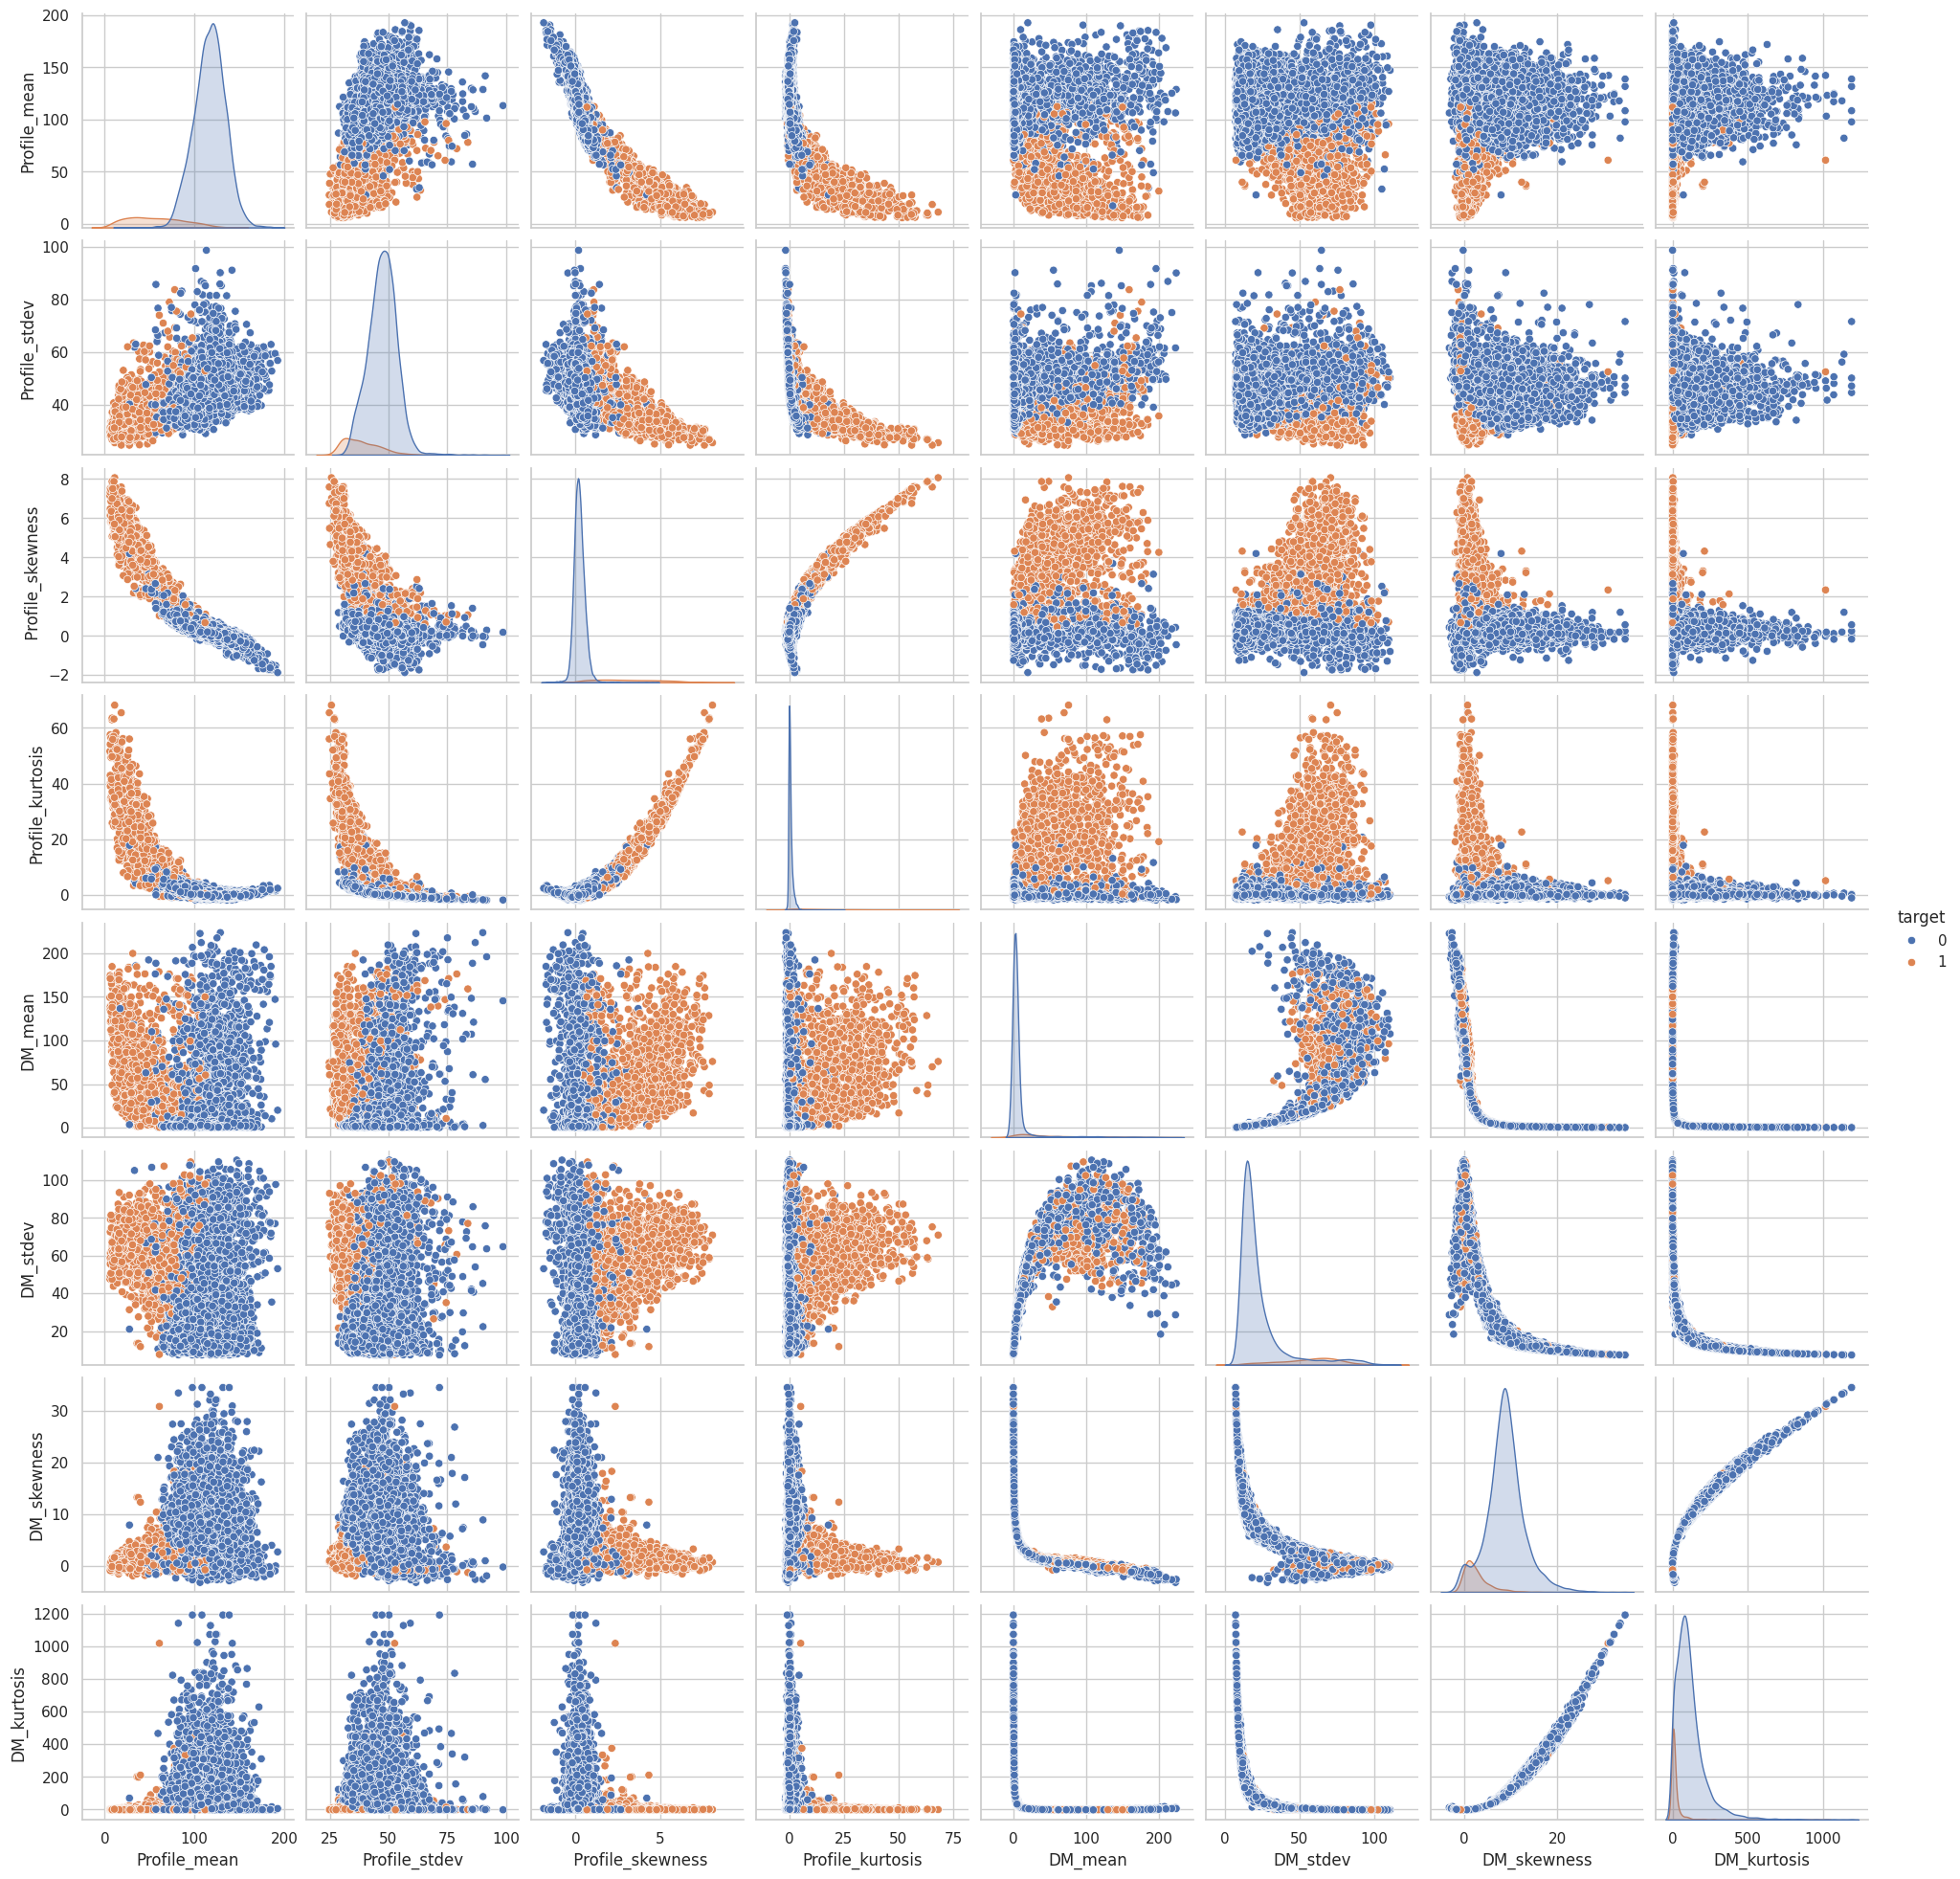

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="target", diag_kind="kde")

plt.show()

Набор данных содержит 17 898 экземпляров, каждый из которых имеет 9 признаков
Предварительно обработаем набор данных, изменив масштаб признаков и разделив его на обучающий и тестовый наборы:

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df.drop('target', axis=1))
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Теперь давайте обучим и оценим три различных классификатора: k-ближайших соседей, случайный лес и метод опорных векторов.

In [125]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9804469273743017
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.93      0.85      0.89       321

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580

Confusion Matrix:
 [[3237   22]
 [  48  273]]


In [126]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9810055865921787
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.93      0.85      0.89       321

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580

Confusion Matrix:
 [[3240   19]
 [  49  272]]


In [127]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9787709497206704
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.94      0.81      0.87       321

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580

Confusion Matrix:
 [[3243   16]
 [  60  261]]


Все три классификатора имеют схожую производительность, достигая точности около 98%.

Учитывая, что классификация пульсаров - задача астрономического масштаба, и любое действие, которое будет производиться исходя из результата расчётов, можно усомниться в достаточности точности в 98%. В учебном масштабе, 98% кажутся достаточно высокой точностью, но если исходя из этих расчётов будут решатся вопросы о трате огромных ресурсов, хотелось бы ещё большей точности. 